<a href="https://colab.research.google.com/github/satyajitghana/ProjektDepth/blob/master/notebooks/05_DepthModel_SmallDatasetGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DepthModel - Small Dataset Creation

In [0]:
! pip install googledrivedownloader

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

bg.zip: 1MOoVAtsVqQ4MFFHMJ1pwM5HaMUT7znsk

depth_fg_bg.zip: 1VC1JwVMRxw7IxZIrAHgEXpK9Hp63H4oz

fg_bg_mask.zip: 1eQl31VtIw_QEm9u5kpJjxL14cFJPWme2

fg_bg.zip: 1EeZ6detKBNhb_qzd98nbKdN5waol5kCg

In [0]:
gdrive_dset = { 'bg.zip': '1MOoVAtsVqQ4MFFHMJ1pwM5HaMUT7znsk', 'depth_fg_bg.zip': '1VC1JwVMRxw7IxZIrAHgEXpK9Hp63H4oz', 'fg_bg_mask.zip': '1eQl31VtIw_QEm9u5kpJjxL14cFJPWme2', 'fg_bg.zip': '1EeZ6detKBNhb_qzd98nbKdN5waol5kCg' } 

## **🚨 PROCEED CAREFULLY**

In [0]:
! rm -r data
! mkdir data

In [0]:
for fname, fid in gdrive_dset.items():
    gdd.download_file_from_google_drive(file_id=fid, dest_path=f'data/{fname}', overwrite=True, unzip=False, showsize=True)

640.0 KiB Done.
2.9 GiB Done.
494.9 MiB Done.
1.6 GiB Done.


Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Create the smaller `96x96` dataset

In [0]:
import os
from pathlib import Path
from zipfile import ZipFile
import zipfile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import gc
from tqdm.auto import tqdm
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset_path = Path('/content/gdrive/My Drive/ProjektDepth/data/')

In [0]:
os.listdir(dataset_path)

['bg.zip',
 'depth_fg_bg.zip',
 'fg_bg_mask.zip',
 'fg_bg.zip',
 'bg_small.zip',
 'fg_bg_small.zip',
 'fg_bg_mask_small.zip',
 'bg_192.zip']

In [0]:
bgzip = ZipFile(dataset_path / 'bg.zip', 'r')
depth_fg_bgzip = ZipFile(dataset_path / 'depth_fg_bg.zip', 'r')
fg_bg_maskzip = ZipFile(dataset_path / 'fg_bg_mask.zip', 'r')
fg_bgzip = ZipFile(dataset_path / 'fg_bg.zip', 'r')

In [0]:
all_files = [info.filename for info in fg_bgzip.infolist() if not info.is_dir()]

In [0]:
len(all_files)

400000

In [0]:
imgdata = fg_bgzip.read(all_files[12333])
img = Image.open(io.BytesIO(imgdata))

In [0]:
img.thumbnail((96, 96),Image.ANTIALIAS)

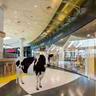

In [0]:
img

In [0]:
del bgzip, depth_fg_bgzip, fg_bg_maskzip, fg_bgzip
gc.collect()

NameError: ignored

Process BG Images

In [0]:
bgzip = ZipFile(dataset_path / 'bg.zip', 'r')
bg_files = [info.filename for info in bgzip.infolist() if not info.is_dir()]

In [0]:
len(bg_files)

100

In [0]:
out_zip = ZipFile('bg_small.zip', mode='w', compression=zipfile.ZIP_STORED)
for bg_file in tqdm(bg_files):

    imgdata = bgzip.read(bg_file)
    img = Image.open(io.BytesIO(imgdata))
    img.thumbnail((96, 96), Image.ANTIALIAS)

    img.save('temp.jpg', optimize=True, quality=30)
    out_zip.write('temp.jpg', bg_file)

out_zip.close()

In [0]:
! cp bg_small.zip /content/gdrive/My\ Drive/ProjektDepth/data/

Process FG_BG Images

In [0]:
fg_bgzip = ZipFile(dataset_path / 'fg_bg.zip', 'r')
fg_bg_files = [info.filename for info in fg_bgzip.infolist() if not info.is_dir()]

In [0]:
len(fg_bg_files)

400000

In [0]:
out_zip = ZipFile('fg_bg_small.zip', mode='w', compression=zipfile.ZIP_STORED)
for img_file in tqdm(fg_bg_files):

    imgdata = fg_bgzip.read(img_file)
    img = Image.open(io.BytesIO(imgdata))
    img.thumbnail((96, 96), Image.ANTIALIAS)

    img.save('temp.jpg', optimize=True, quality=30)
    out_zip.write('temp.jpg', img_file)
    
out_zip.close()

In [0]:
! cp fg_bg_small.zip /content/gdrive/My\ Drive/ProjektDepth/data/

Process FG_BG_MASK Images

In [0]:
fg_bg_maskzip = ZipFile(dataset_path / 'fg_bg_mask.zip', 'r')
fg_bg_maskfiles = [info.filename for info in fg_bg_maskzip.infolist() if not info.is_dir()]

In [0]:
len(fg_bg_maskfiles)

400000

In [0]:
out_zip = ZipFile('fg_bg_mask_small.zip', mode='w', compression=zipfile.ZIP_STORED)
for img_file in tqdm(fg_bg_maskfiles):

    imgdata = fg_bg_maskzip.read(img_file)
    img = Image.open(io.BytesIO(imgdata))
    img.thumbnail((96, 96), Image.ANTIALIAS)

    img.save('temp.jpg', optimize=True, quality=30)
    out_zip.write('temp.jpg', img_file)
    
out_zip.close()

In [0]:
! cp fg_bg_mask_small.zip /content/gdrive/My\ Drive/ProjektDepth/data/

Process DEPTH_FG_BG Images

In [0]:
! cp /content/gdrive/My\ Drive/DepthProject/depth_dataset_zipped/depth_fg_bg.zip ./

In [0]:
dataset_path = Path('./')

In [0]:
depth_fg_bgzip = ZipFile(dataset_path / 'depth_fg_bg.zip', 'r')
depth_fg_bgfiles = [info.filename for info in depth_fg_bgzip.infolist() if not info.is_dir()]

In [0]:
len(depth_fg_bgfiles)

400000

In [0]:
out_zip = ZipFile('depth_fg_bg_small.zip', mode='w', compression=zipfile.ZIP_STORED)
for img_file in tqdm(depth_fg_bgfiles):

    imgdata = depth_fg_bgzip.read(img_file)
    img = Image.open(io.BytesIO(imgdata)).convert('L')
    img.thumbnail((96, 96), Image.ANTIALIAS)

    img.save('temp.png')
    out_zip.write('temp.png', img_file)
    
out_zip.close()

In [0]:
! cp depth_fg_bg_small.zip /content/gdrive/My\ Drive/DepthProject/depth_dataset_zipped/